## <a id='toc1_1_'></a>[Gradient Descent Methods](#toc0_)

In this notebook, we will explore various loss functions and apply gradient descent methods to optimize these functions. Our focus will be on the Diabetes dataset from the scikit-learn library, a well-regarded dataset in the machine learning community. This dataset consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression. We will use these data points to predict the quantitative measure of disease progression one year after baseline, thus practicing the application of regression analysis in a medical context.

## <a id='toc1_2_'></a>[Authors](#toc0_)
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**
* **Kasra Hajiheidari**

## <a id='toc1_3_'></a>[Table of Contents](#toc0_)

- [Gradient Descent Methods](#toc1_1_)    
  - [Authors](#toc1_2_)    
  - [Table of Contents](#toc1_3_)    
  - [Setting Up the Environment](#toc1_4_)    
  - [Data Preparation](#toc1_5_)    
    - [Dataset Description](#toc1_5_1_)    
    - [Loading the Dataset](#toc1_5_2_)    
    - [Preprocessing](#toc1_5_3_)    
      - [Missing Values](#toc1_5_3_1_)    
      - [Duplicates](#toc1_5_3_2_)    
      - [Type Conversion](#toc1_5_3_3_)    
      - [Normalization](#toc1_5_3_4_)    
      - [Train-Test Split](#toc1_5_3_5_)    
  - [Loss Functions](#toc1_6_)    
    - [Mean Squared Error (MSE)](#toc1_6_1_)    
    - [Mean Absolute Error (MAE)](#toc1_6_2_)    
    - [Root Mean Squared Error (RMSE)](#toc1_6_3_)    
    - [R² Score (Coefficient of Determination)](#toc1_6_4_)    
    - [Ordinary Least Squares (OLS)](#toc1_6_5_)    
  - [Regression Model](#toc1_7_)    
    - [Model](#toc1_7_1_)    
    - [Training](#toc1_7_2_)    
  - [Evaluation](#toc1_8_)    
    - [Results Summary Table](#toc1_8_1_)    
  - [Questions](#toc1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_4_'></a>[Setting Up the Environment](#toc0_)

In [18]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install tqdm
# !pip install scipy
# !pip install scikit-learn
# !pip install statsmodels

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import tqdm


import warnings
warnings.filterwarnings("ignore")

## <a id='toc1_5_'></a>[Data Preparation](#toc0_)

### <a id='toc1_5_1_'></a>[Dataset Description](#toc0_)

The sklearn diabetes dataset is a built-in sample dataset included with scikit-learn for regression tasks. It contains information about patients with diabetes.


Origin: The dataset is originally sourced from the diabetes dataset available in the StatLib library. It was created by Bradley Efron, Trevor Hastie, Iain Johnstone, and Robert Tibshirani as part of their research.

Contents: The dataset consists of ten baseline variables, age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements for 442 diabetes patients. The response of interest is a quantitative measure of disease progression one year after baseline.

Features:
- Age: Age in years
- Sex: Gender of the patient (0 for female, 1 for male)
- BMI: Body mass index, a measure of body fat based on height and weight
- BP: Average blood pressure
- S1 to S6: Six blood serum measurements

Target Variable (Disease Progression): A quantitative measure of diabetes progression after one year from baseline.

Purpose: The dataset is commonly used for regression tasks, particularly in predictive modeling and assessing the efficacy of various algorithms in predicting diabetes progression.

Size: It contains data for 442 patients.

### <a id='toc1_5_2_'></a>[Loading the Dataset](#toc0_)

In [20]:
diabetes = datasets.load_diabetes(as_frame=True, scaled= False)
df = diabetes.frame
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


### <a id='toc1_5_3_'></a>[Preprocessing](#toc0_)

In [21]:
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


#### <a id='toc1_5_3_1_'></a>[Missing Values](#toc0_)

In [22]:
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


#### <a id='toc1_5_3_2_'></a>[Duplicates](#toc0_)

There is no duplicate data in the dataset.

In [23]:
print(df.duplicated().sum())

0


#### <a id='toc1_5_3_3_'></a>[Type Conversion](#toc0_)

As all the features are numerical, we do not need to convert any data types.

#### <a id='toc1_5_3_4_'></a>[Normalization](#toc0_)

StandardScaler is a preprocessing technique in machine learning used to standardize the features by removing the mean and scaling them to unit variance. This ensures that each feature has a mean of 0 and a standard deviation of 1.

Standardization is often performed on numerical features in datasets before training machine learning models. It helps in situations where the features have different scales or units, ensuring that each feature contributes equally to the analysis and preventing features with larger scales from dominating the model's training process.

In [24]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-0.014719
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,-1.001659
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-0.144580
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.699513
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,-0.222496


#### <a id='toc1_5_3_5_'></a>[Train-Test Split](#toc0_)

In [25]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
print(f"Count of instances in\n Whole Dataset: {X.shape[0]}\n Training set: {X_train.shape[0]}\n Testing set: {X_test.shape[0]}")


Count of instances in
 Whole Dataset: 442
 Training set: 419
 Testing set: 23


# <a id='toc1_6_'></a>[Main Task](#toc0_)

## <a id='toc1_6_'></a>[Loss Functions](#toc0_)

### <a id='toc1_6_1_'></a>[Mean Squared Error (MSE)](#toc0_)

In [26]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### <a id='toc1_6_2_'></a>[Mean Absolute Error (MAE)](#toc0_)

In [27]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

### <a id='toc1_6_3_'></a>[Root Mean Squared Error (RMSE)](#toc0_)

In [28]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

### <a id='toc1_6_4_'></a>[R² Score (Coefficient of Determination)](#toc0_)

The $ R^2 $ (R-squared) score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. It's used to evaluate the goodness of fit of the regression model to the observed data.
   $ \text{SST} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 $
   $ \text{SSE} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $
   $ R^2 = 1 - \frac{\text{SSE}}{\text{SST}} $

 the $ R^2 $ score provides a measure of how well the regression model fits the observed data, with higher values indicating better fit. It's an important metric for evaluating the performance of regression models and understanding the proportion of variance explained by the predictors.



In [29]:
def r2(y_true, y_pred):
    return 1 - mse(y_true, y_pred) / mse(y_true, np.mean(y_true))

### <a id='toc1_6_5_'></a>[Ordinary Least Squares (OLS)](#toc0_)

Ordinary Least Squares (OLS) is a method used to estimate the parameters of a linear regression model by minimizing the sum of the squared differences between the observed and predicted values of the dependent variable(Minimizing MSE). It's one of the most common and widely used techniques for fitting linear regression models to data.


OLS is widely used because it provides unbiased estimates of the regression coefficients and has well-established statistical properties. It's particularly suitable for linear regression models when the assumptions of linearity, independence, homoscedasticity, and normality of residuals hold true.

In [30]:
def ols(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

## <a id='toc1_7_'></a>[Regression Model](#toc0_)

### <a id='toc1_7_1_'></a>[Model](#toc0_)

Linear Regression is a fundamental algorithm in machine learning and statistics. It's a supervised learning technique that predicts a continuous outcome variable (Y) based on one or more predictor variables (X).

The goal of Linear Regression is to find the best fit line that can accurately predict the output for the continuous response variable. This line is represented by the equation:

Y = a + bX + e

Where:
- Y is the dependent variable (output/outcome/prediction/estimation)
- X is the independent variable (input/feature)
- a is the Y-intercept (the value of Y when X=0)
- b is the slope of the line (the change in Y that comes with a one-unit change in X)
- e is the error term (difference between actual and predicted values)

The algorithm uses the method of least squares to estimate the values of 'a' and 'b'. It minimizes the sum of the squared residuals (the differences between the observed and predicted values) to find the 'line of best fit'.

Linear Regression assumptions:
- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

### <a id='toc1_7_1_'></a>[Sklearn Linear Regression Model](#toc0_)

In [31]:
model = LinearRegression()

#### <a id='toc1_7_2_'></a>[Training](#toc0_)

In [32]:
model.fit(X_train, y_train)

LinearRegression()

#### <a id='toc1_8_'></a>[Evaluation](#toc0_)

In [33]:
y_pred = model.predict(X_test)

mean_squared_error = mse(y_test, y_pred)
mean_absolute_error = mae(y_test, y_pred)
root_mean_squared_error = rmse(y_test, y_pred)
r_squared = r2(y_test, y_pred)

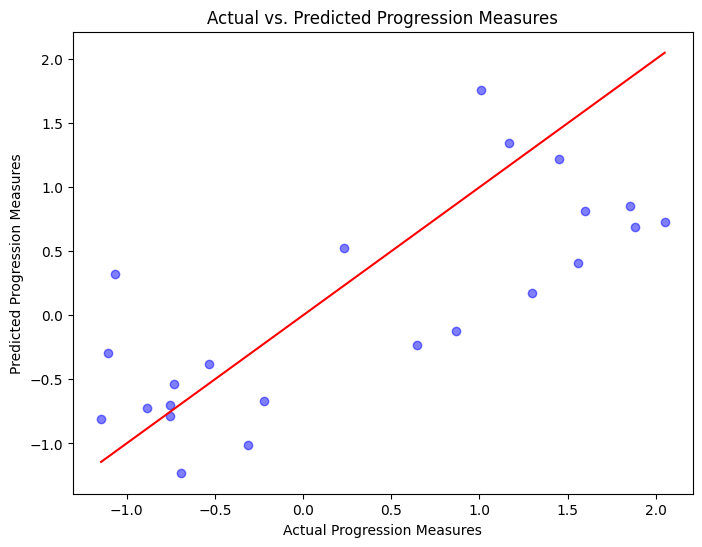

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Progression Measures')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.show()

In [35]:
y_pred_train = model.predict(X_train)

mean_squared_error_train = mse(y_train, y_pred_train)
mean_absolute_error_train = mae(y_train, y_pred_train)
root_mean_squared_error_train = rmse(y_train, y_pred_train)
r_squared_train = r2(y_train, y_pred_train)

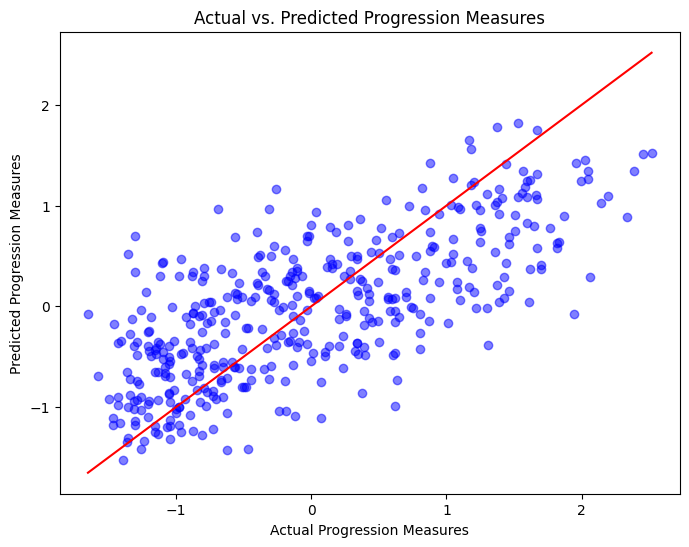

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Progression Measures')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.show()

#### <a id='toc1_8_1_'></a>[Results Summary Table](#toc0_)

In [37]:
results_summary_data = [
    ['', 'MSE', 'MAE', 'RMSE', 'R2 score'],
    ['Train Set', mean_squared_error_train, mean_absolute_error_train, root_mean_squared_error_train, r_squared_train], 
    ['Test Set', mean_squared_error, mean_absolute_error, root_mean_squared_error, r_squared]
]
results_summary_df = pd.DataFrame(results_summary_data, columns=results_summary_data[0])
results_summary_df


,,MSE,MAE,RMSE,R2 score
0,,MSE,MAE,RMSE,R2 score
1,Train Set,0.477449,0.55793,0.690977,0.513588
2,Test Set,0.592948,0.63993,0.770031,0.516379


### <a id='toc1_7_1_'></a>[Ordinary Least Squares Regression Model](#toc0_)

In [38]:
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train_ols)

#### <a id='toc1_7_2_'></a>[Training](#toc0_)

In [50]:
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     43.08
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           7.57e-58
Time:                        20:12:44   Log-Likelihood:                -439.65
No. Observations:                 419   AIC:                             901.3
Df Residuals:                     408   BIC:                             945.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0137      0.034     -0.402      0.6

In [40]:
print(result.params)
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

const   -0.013747
age      0.007883
sex     -0.159135
bmi      0.328863
bp       0.210192
s1      -0.524022
s2       0.298020
s3       0.085507
s4       0.152383
s5       0.437023
s6       0.037642
dtype: float64
Coefficients: [ 0.00788304 -0.15913462  0.3288632   0.21019187 -0.52402184  0.29801998
  0.08550663  0.1523835   0.43702266  0.03764161]
Intercept: -0.013746548245312566


In [ ]:
print(result.)

#### <a id='toc1_8_'></a>[Evaluation](#toc0_)

In [41]:
y_pred_ols= result.predict(X_test_ols)

mean_squared_error_ols = mse(y_test, y_pred_ols)
mean_absolute_error_ols = mae(y_test, y_pred_ols)
root_mean_squared_error_ols = rmse(y_test, y_pred_ols)
r_squared_ols = r2(y_test, y_pred_ols)

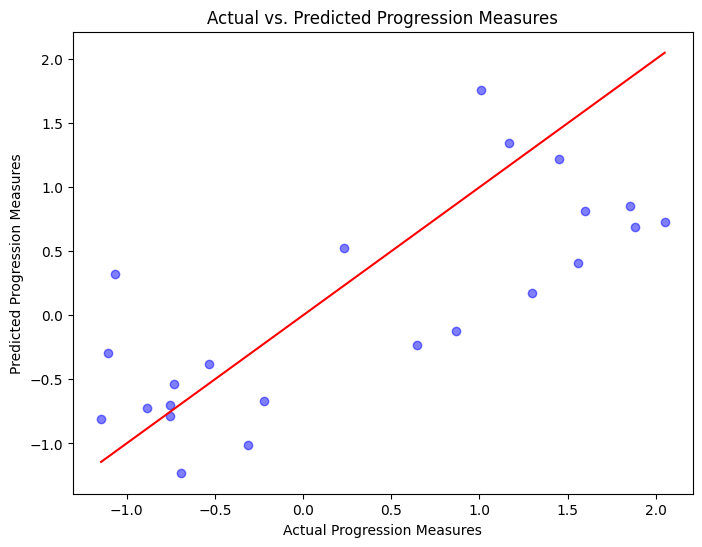

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ols, color='blue', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Progression Measures')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.show()

In [43]:
y_pred_train_ols = result.predict(X_train_ols)

mean_squared_error_train_ols = mse(y_train, y_pred_train_ols)
mean_absolute_error_train_ols = mae(y_train, y_pred_train_ols)
root_mean_squared_error_train_ols = rmse(y_train, y_pred_train_ols)
r_squared_train_ols = r2(y_train, y_pred_train_ols)

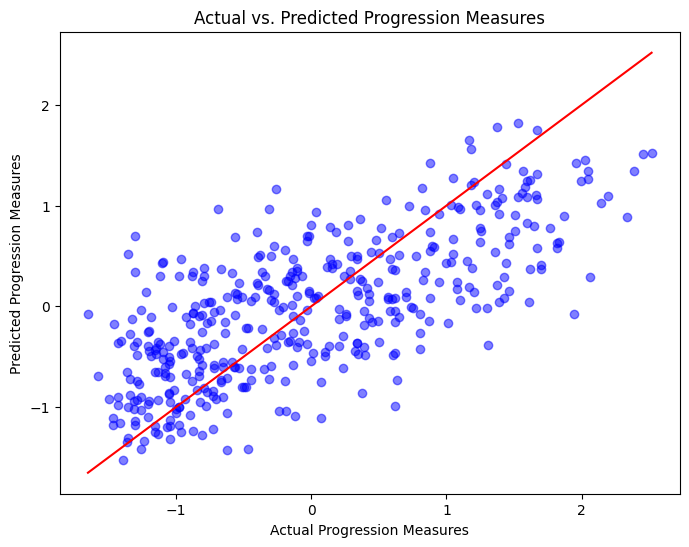

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train_ols, color='blue', alpha=0.5)  # Actual vs. Predicted
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Diagonal line for perfect predictions
plt.title('Actual vs. Predicted Progression Measures')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')
plt.show()

#### <a id='toc1_8_1_'></a>[Results Summary Table](#toc0_)

In [45]:
results_summary_data_ols = [
    ['', 'MSE', 'MAE', 'RMSE', 'R2 score'],
    ['Train Set', mean_squared_error_train_ols, mean_absolute_error_train_ols, root_mean_squared_error_train_ols, r_squared_train_ols], 
    ['Test Set', mean_squared_error_ols, mean_absolute_error_ols, root_mean_squared_error_ols, r_squared_ols]
]
results_summary_df_ols = pd.DataFrame(results_summary_data_ols, columns=results_summary_data_ols[0])
results_summary_df_ols

,,MSE,MAE,RMSE,R2 score
0,,MSE,MAE,RMSE,R2 score
1,Train Set,0.477449,0.55793,0.690977,0.513588
2,Test Set,0.592948,0.63993,0.770031,0.516379


The LinearRegression model from scikit-learn also uses the Ordinary Least Squares (OLS) method to estimate the coefficients of the linear regression model. Therefore, if both scikit-learn's LinearRegression and statsmodels' OLS are applied to the same data with the same settings, they should produce identical coefficients and intercept.

## <a id='toc1_9_'></a>[Questions](#toc0_)

**Analyze and evaluate the values in Table (1).**

Let's analyze and evaluate the performance metrics:

1. **Mean Squared Error (MSE)**:
   - Train Set: 0.477449, Test Set: 0.592948
   - MSE measures the average squared difference between the actual and predicted values. 
   - Lower values indicate better model performance. The MSE for the training set is lower than that of the test set, which is expected as models tend to perform better on data they were trained on.

2. **Mean Absolute Error (MAE)**:
   - Train Set: 0.55793, Test Set: 0.63993
   - MAE measures the average absolute difference between the actual and predicted values. 
   - Similar to MSE, lower values are desirable. The MAE for the training set is lower than that of the test set, indicating better performance on the training data.

3. **Root Mean Squared Error (RMSE)**:
   - Train Set: 0.690977, Test Set: 0.770031
   - RMSE is the square root of the MSE. It provides the measure of the standard deviation of the residuals.
   - As with MSE and MAE, lower values are better. RMSE follows the same pattern as MSE and MAE, with the training set having a lower value than the test set.

4. **R² Score (Coefficient of Determination)**:
   - Train Set: 0.513588, Test Set: 0.516379
   - R² score represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - R² ranges from 0 to 1, with higher values indicating better model fit. The R² scores for both training and test sets are relatively low, indicating that the model explains only a moderate amount of the variance in the data.

Overall, based on these metrics, the model performs slightly better on the training set compared to the test set, which is expected. However, there is room for improvement, particularly in terms of reducing the errors and increasing the amount of variance explained by the model.

Also by comparing MAE and MSE values, it suggests that the absolute differences between the actual and predicted values are, on average, higher than the squared differences.
This comparison doesn't necessarily imply that the values must be less than 1. Instead, it indicates that the model's predictions are, on average, closer to the actual values when measured using the squared differences (MSE) rather than the absolute differences (MAE).

In essence, while the MAE and MSE measure different aspects of the errors, a higher MAE compared to MSE suggests that the model's predictions have relatively larger absolute errors compared to squared errors.

**Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be.  
Also, discuss the differences between these two metrics.**

The $ R^2 $ (R-squared) and Adjusted $ R^2 $ (Adjusted R-squared) are both metrics used to evaluate the goodness of fit of a regression model. Here's an explanation of what these values indicate and their implications:

1. **R-squared ($ R^2 $)**:
   - $ R^2 $ represents the proportion of the variance in the dependent variable that is explained by the independent variables in the regression model.
   - It ranges from 0 to 1, where:
     - 0 indicates that the model explains none of the variability of the response data around its mean.
     - 1 indicates that the model explains all the variability of the response data around its mean, i.e., the model perfectly predicts the response variable.
   - In our case, an $ R^2 $ value of 0.514 means that approximately 51.4% of the variance in the dependent variable is explained by the independent variables in the model.

2. **Adjusted R-squared (Adjusted $ R^2 $)**:
   - Adjusted $ R^2 $ is a modified version of $ R^2 $ that adjusts for the number of predictors in the model.
   - It penalizes the addition of irrelevant predictors to the model, which can lead to overfitting.
   - Adjusted $ R^2 $ takes into account the degrees of freedom and the sample size of the model.
   - It generally provides a more accurate measure of the model's goodness of fit when there are multiple predictors in the model.
   - In our case, an Adjusted $ R^2 $ value of 0.502 indicates that approximately 50.2% of the variance in the dependent variable is explained by the independent variables after adjusting for the number of predictors.

Differences between $ R^2 $ and Adjusted $ R^2 $:

- **Interpretation**: $ R^2 $ measures the proportion of variance explained by the model, while Adjusted $ R^2 $ accounts for the number of predictors in the model and provides a more accurate measure when comparing models with different numbers of predictors.
  
- **Penalization for Complexity**: Adjusted $ R^2 $ penalizes the addition of unnecessary predictors to the model, whereas $ R^2 $ does not.

- **Range**: Both $ R^2 $ and Adjusted $ R^2 $ range from 0 to 1, but Adjusted $ R^2 $ may be lower than $ R^2 $ if the model includes irrelevant predictors.

The adjusted $ R^2 $ value can be lower than the $ R^2 $ value for several reasons, especially when there are multiple predictors in the model. Here are a few possible explanations for why the adjusted $ R^2 $ value is lower than the $ R^2 $ value in your case:

1. **Model Complexity**:
   - The adjusted $ R^2 $ value accounts for the number of predictors in the model. If your model includes multiple predictors, the adjusted $ R^2 $ value will be adjusted downward to penalize the inclusion of additional predictors.
   - As the number of predictors increases, the adjusted $ R^2 $ value will tend to be lower than the $ R^2 $ value, especially if some of the predictors are not highly correlated with the dependent variable.

2. **Overfitting**:
   - If the model is overfitting the training data, the $ R^2 $ value may be artificially inflated, leading to a higher $ R^2 $ value compared to the adjusted $ R^2 $ value.
   - The adjusted $ R^2 $ value provides a more conservative estimate of the model's goodness of fit by penalizing the inclusion of unnecessary predictors.

3. **Sample Size**:
   - The adjusted $ R^2 $ value also takes into account the sample size of the data. If the sample size is relatively small compared to the number of predictors, the adjusted $ R^2 $ value may be lower than the $ R^2 $ value.
   - A smaller sample size may result in a less precise estimate of the model's performance, leading to a lower adjusted $ R^2 $ value.

4. **Correlation Among Predictors**:
   - If there is high correlation among the predictors in the model, the adjusted $ R^2 $ value may be lower than the $ R^2 $ value.
   - High correlation among predictors can inflate the $ R^2 $ value, but the adjusted $ R^2 $ value adjusts for this by penalizing redundant predictors.


**Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.**

In the part 4 table, the column labeled "P>|t|" contains the p-values associated with each coefficient estimate in the regression model. Let's review the p-values obtained in the table for each column of data:

- **const**: The p-value associated with the constant term (intercept) is 0.688. This suggests that the constant term is not statistically significant at conventional levels of significance (e.g., α = 0.05). A p-value greater than 0.05 indicates that we fail to reject the null hypothesis that the coefficient is equal to zero.

- **age**: The p-value for the predictor variable "age" is 0.836, indicating that it is not statistically significant. Similar to the constant term, we fail to reject the null hypothesis that the coefficient for "age" is equal to zero.

- **sex**: The p-value for the predictor variable "sex" is 0.000, indicating that it is statistically significant at conventional levels of significance. A p-value less than 0.05 suggests that we reject the null hypothesis that the coefficient for "sex" is equal to zero, implying that "sex" has a significant effect on the dependent variable.

- **bmi**, **bp**, **s1**, **s2**, **s3**, **s4**, **s5**, **s6**: These predictor variables have p-values less than 0.05, indicating that they are statistically significant predictors of the dependent variable.

Regarding the appropriate value for p-values:
- Conventionally, a p-value less than 0.05 is often considered statistically significant. However, the significance level (α) can vary depending on the specific context and the desired level of confidence.
- In hypothesis testing, smaller p-values provide stronger evidence against the null hypothesis. Therefore, smaller p-values are generally considered more desirable.
- It's essential to interpret p-values in conjunction with effect sizes, confidence intervals, and the context of the analysis to make informed conclusions about the significance of predictor variables.

In summary, in the provided table:
- "sex", "bmi", "bp", "s1", "s5" have p-values less than 0.05, indicating that they are statistically significant predictors.
- "const", "age", "s2", "s3", "s4", "s6" have p-values greater than 0.05, suggesting that they are not statistically significant predictors in this model.

**Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.**

To assess and analyze the importance of each feature in the dataset based on the results obtained in the table, we can consider the coefficients and associated p-values for each feature. Here's how we can interpret the importance of each feature:

1. **Coefficient Magnitude**:
   - The magnitude of the coefficient indicates the strength and direction of the relationship between the feature and the target variable.
   - Larger coefficient magnitudes suggest a stronger influence of the feature on the target variable.
   - Features with larger coefficient magnitudes are typically considered more important in explaining the variation in the target variable.

2. **Statistical Significance (P-value)**:
   - The p-value associated with each coefficient provides information about the statistical significance of the relationship between the feature and the target variable.
   - Features with low p-values (typically less than 0.05) are considered statistically significant.
   - Statistically significant features are more likely to have a meaningful impact on the target variable.

3. **Interpretation**:
   - Features with statistically significant coefficients (low p-values) and large coefficient magnitudes are considered important in explaining the variation in the target variable.
   - Conversely, features with statistically insignificant coefficients (high p-values) or small coefficient magnitudes may have less importance in explaining the variation in the target variable.

Based on the table, we can assess the importance of each feature by considering both the coefficients and p-values:

1. **const**:
   - Coefficient: -0.0137
   - P-value: 0.688
   - Interpretation: The constant term represents the intercept of the regression model. However, in this case, the coefficient is not statistically significant (p-value > 0.05). Therefore, the constant term may not be important in explaining the variation in the individual's diabetic condition.

2. **age**:
   - Coefficient: 0.0079
   - P-value: 0.836
   - Interpretation: The coefficient for age is not statistically significant (p-value > 0.05), indicating that age may not have a significant impact on the individual's diabetic condition in this model.

3. **sex**:
   - Coefficient: -0.1591
   - P-value: 0.000
   - Interpretation: The coefficient for sex is statistically significant (p-value < 0.05), suggesting that sex may have a significant impact on the individual's diabetic condition. The negative coefficient indicates that, on average, males have a lower individual's diabetic condition value compared to females .

4. **bmi**, **bp**, **s1**, **s4**, **s5**:
   - These features have coefficients that are statistically significant (p-value < 0.05) and relatively large in magnitude.
   - Interpretation: These features are likely to have a significant impact on the individual's diabetic condition and are considered important predictors in the model.

5. **s2**, **s3**, **s6**:
   - These features have coefficients that are not statistically significant (p-value > 0.05).
   - Interpretation: These features may not have a significant impact on the individual's diabetic condition in this model.

In summary, based on the coefficients and p-values:
- Features such as sex, bmi, bp, s1, s4, and s5 appear to be important predictors of the individual's diabetic condition, as they have statistically significant coefficients.
- Features such as const, age, s2, s3, and s6 may have less importance in explaining the variation in the individual's diabetic condition, as they have coefficients that are not statistically significant.